In [8]:
import types
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bf71b2aaab5e4141bd379fd5c105495e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yzOY9_mjkxMFIFV4Yi1nU4fp8lMLWAGaYgtUBj5M1pn-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_bf71b2aaab5e4141bd379fd5c105495e.get_object(Bucket='knnclassificationanalysis-donotdelete-pr-chgdx8xn00ejvc',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Diabetes = pd.read_csv(body)
Diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [9]:
Diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Diabetes['Diabetes'] = labelencoder_y.fit_transform(Diabetes['Diabetes'])

In [11]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


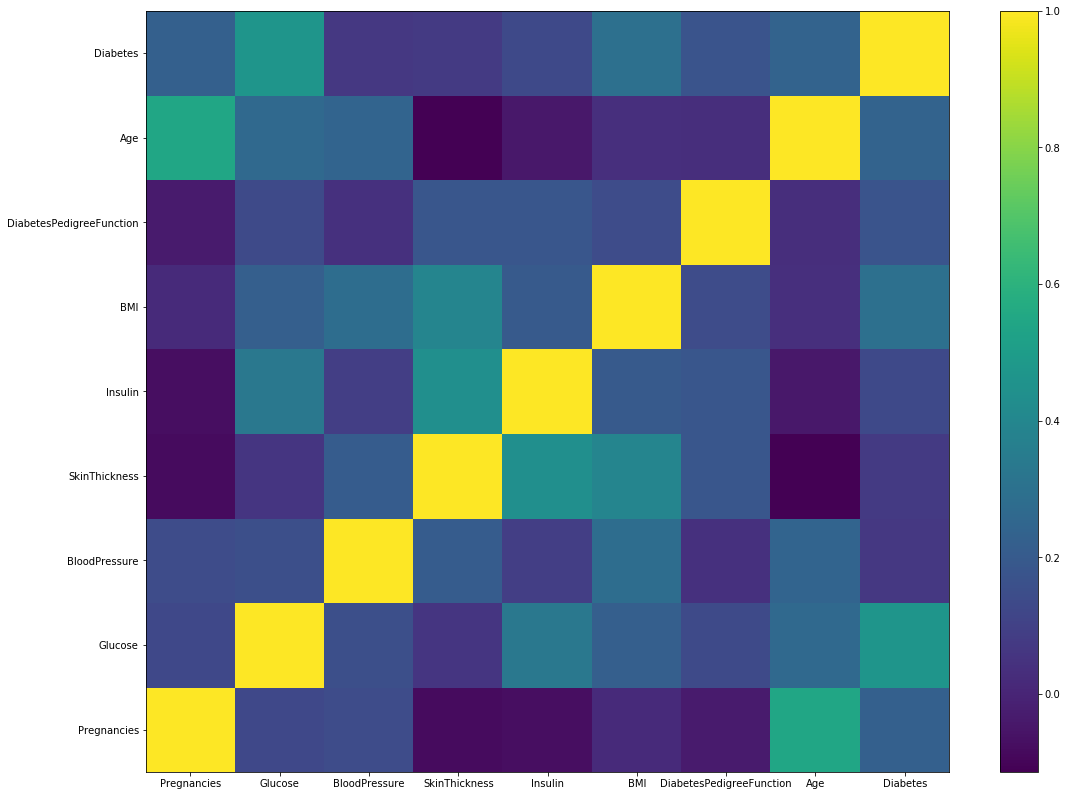

In [12]:
fig = plt.figure(figsize=(18, 14))
corr = Diabetes.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [15]:
from sklearn.model_selection import train_test_split
X = Diabetes.iloc[:, :-1].values
Y=  Diabetes.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,random_state= 0) 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline(
    [('rescale', StandardScaler()), 
     ('classifier',KNeighborsClassifier(n_neighbors=5, metric = 'euclidean', p=2))
    ])
pipe.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('rescale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [35]:
Y_pred = pipe.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
y_predict1 = pipe.predict([[1,85,66,29,0,26.6,0.351,31]])
y_predict1

array([0])

In [37]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test,Y_pred)
ac

0.7987012987012987

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[93, 14],
       [17, 30]])

In [39]:
import sklearn.metrics as metrics
fpr, tpr, threashhold =  metrics.roc_curve(Y_test,Y_pred)

In [40]:
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.7537283754225492

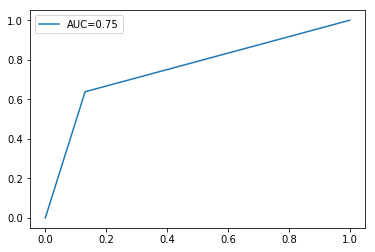

In [41]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend()
plt.show()